<a href="https://colab.research.google.com/github/comaserious/deep_learning_practice/blob/main/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95_%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [4]:
iris_data = load_iris()
x_train ,x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2 , random_state= 42)

In [5]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='iris_tree.dot', feature_names=iris_data.feature_names, class_names=iris_data.target_names, filled=True)

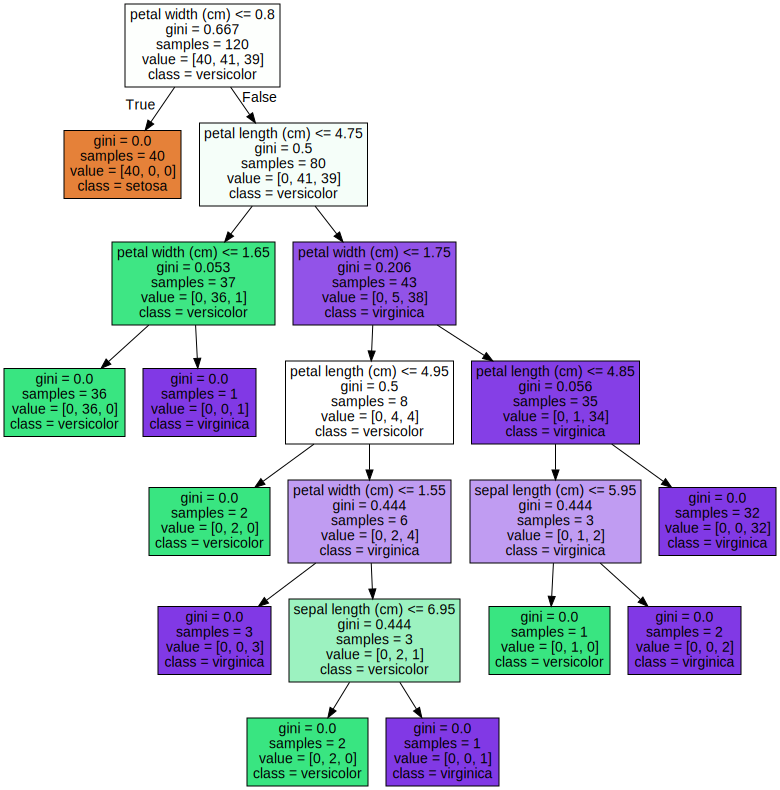

In [7]:
import graphviz

with open('iris_tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [9]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [10]:
import pandas as pd
cancer_df = pd.DataFrame(data=cancer.data, columns= cancer.feature_names)

cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

In [12]:
lr_model = LogisticRegression(solver="liblinear")
knn_model = KNeighborsClassifier(n_neighbors=8)

In [13]:
vo_model = VotingClassifier(estimators=[('lr', lr_model), ('knn', knn_model)], voting='soft')
vo_model.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                             ('knn', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [14]:
pred = vo_model.predict(x_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [15]:
accuracy_score(y_test,pred)

0.9649122807017544

In [16]:
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
accuracy_score(y_test,lr_pred)

0.956140350877193

In [18]:
knn_model.fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)
accuracy_score(y_test,knn_pred)

0.956140350877193

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [20]:
cancer = load_breast_cancer()


In [22]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

In [26]:
rf_model = RandomForestClassifier(random_state=42, max_depth=5)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [27]:
pred = rf_model.predict(x_test)
accuracy_score(y_test,pred)

0.9649122807017544

In [28]:
from sklearn.model_selection import GridSearchCV
params = {
    "max_depth" : [2,4,6],
    "min_samples_split": [2,4,6,8,10],
    "min_samples_leaf": [2,8,16]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, cv=5)
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [2, 8, 16],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [29]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [30]:
grid_search.best_score_

0.956043956043956

In [31]:
rf_model= RandomForestClassifier(random_state=42, max_depth=6, min_samples_leaf=2, min_samples_split=6)
rf_model.fit(x_train,y_train)
pred = rf_model.predict(x_test)

accuracy_score(y_test,pred)

0.9649122807017544

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
import time

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state = 42)

start_time = time.time()

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train,y_train)
end_time= time.time()

print(f"학습하는데 걸리는 시간 : {end_time - start_time} seconds")
pred = gb_model.predict(x_test)
accuracy_score(y_test,pred)


학습하는데 걸리는 시간 : 0.6679761409759521 seconds


0.956140350877193